In [226]:
import cmocean.cm as cm
import importlib
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

from salishsea_tools import river_201803 as rivers
from salishsea_tools import river_201702 as old_rivers

%matplotlib inline

In [227]:
cmap = plt.get_cmap(cm.deep)
cmap.set_bad('darkgreen')
cmap_bwr = plt.get_cmap(cm.oxy)
cmap_bwr.set_bad('black')

In [228]:
# 201702b bathymetry
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
mbathy = mesh.variables['mbathy'][0,:,:] 
gdepw = mesh.variables['gdepw_0'][0,:,:,:]
deptht = mesh.variables['gdept_1d'][0,:]
surface_tmask = mesh.variables['tmask'][0,0,:,:]
surface_tmask_7 = np.abs(surface_tmask-1)
mesh.close()

NEMO_bathy_7 = np.zeros(mbathy.shape)
for i in range(NEMO_bathy_7.shape[1]):
    for j in range(NEMO_bathy_7.shape[0]):
        level = mbathy[j,i]
        NEMO_bathy_7[j,i] = gdepw[level,j,i]
NEMO_bathy_7 = np.ma.masked_array(NEMO_bathy_7, mask = surface_tmask_7)

In [229]:
# 201803p bathymetry
mesh = nc.Dataset('/data/sallen/results/MEOPAR/mudflats/201803b/mesh_mask.nc')
mbathy = mesh.variables['mbathy'][0,:,:] 
gdepw = mesh.variables['gdepw_0'][0,:,:,:]
deptht = mesh.variables['gdept_1d'][0,:]
surface_tmask = mesh.variables['tmask'][0,0,:,:]
surface_tmask_8 = np.abs(surface_tmask-1)
mesh.close()

NEMO_bathy_8 = np.zeros(mbathy.shape)
for i in range(NEMO_bathy_8.shape[1]):
    for j in range(NEMO_bathy_8.shape[0]):
        level = mbathy[j,i]
        NEMO_bathy_8[j,i] = gdepw[level,j,i]
NEMO_bathy_8 = np.ma.masked_array(NEMO_bathy_8, mask = surface_tmask_8)

## Rivers

In [290]:
# Rivers
importlib.reload(rivers)

<module 'salishsea_tools.river_201803' from '/ocean/sallen/allen/research/Meopar/Tools/SalishSeaTools/salishsea_tools/river_201803.py'>

In [231]:
# Rivers
def plot_rivers(ax1, ax2, imin, imax, jmin, jmax, surface_tmask_7, surface_tmask_8):
    for region in rivers.prop_dict:
        for river in rivers.prop_dict[region]:
            ii = rivers.prop_dict[region][river]['i']
            jj = rivers.prop_dict[region][river]['j']
            if ii < imax and ii >= imin and jj < jmax and jj >= jmin:
                if surface_tmask_8[ii, jj] == 0:
                    ax2.plot(jj+0.5, ii+0.5, 'ms')
                else:
                    ax2.plot(jj+0.5, ii+0.5, 'yo')
                    print (ii, jj, 'on land new')
    for region in old_rivers.prop_dict:
        for river in old_rivers.prop_dict[region]:
            ii = old_rivers.prop_dict[region][river]['i']
            jj = old_rivers.prop_dict[region][river]['j']
            if ii < imax and ii >= imin and jj < jmax and jj >= jmin:
                if surface_tmask_7[ii, jj] == 0:
                    ax1.plot(jj+0.5, ii+0.5, 'ms')
                else:
                    ax1.plot(jj+0.5, ii+0.5, 'yo')
                    print (ii, jj, 'on land old')

In [232]:
def do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8, vmax=20, bigger=10):
    fig, ax = plt.subplots(2, 2, figsize=(bigger, bigger))
    ax[0, 0].pcolormesh(range(jmin,jmax), range(imin,imax), NEMO_bathy_7[imin:imax, jmin:jmax], cmap=cmap, vmax=vmax)
    ax[0, 1].pcolormesh(range(jmin,jmax), range(imin,imax), NEMO_bathy_8[imin:imax, jmin:jmax], cmap=cmap, vmax=vmax)
    ax[1, 0].pcolormesh(range(jmin,jmax), range(imin,imax), surface_tmask_7[imin:imax, jmin:jmax], cmap=cm.dense)
    plot_rivers(ax[0, 0], ax[0, 1], imin, imax, jmin, jmax, surface_tmask_7, surface_tmask_8)
    ax[1, 1].pcolormesh(range(jmin,jmax), range(imin,imax), surface_tmask_8[imin:imax, jmin:jmax], cmap=cm.dense)

    for ii in range(imin, imax):
        for jj in range(jmin, jmax):
            if surface_tmask_8[ii, jj] > surface_tmask_7[ii, jj]:
                ax[1, 0].plot(jj+0.5, ii+0.5, 'r*')
            if NEMO_bathy_8[ii, jj] != NEMO_bathy_7[ii, jj]:
                ax[1, 1].plot(jj+0.5, ii+0.5, 'yo')
    return fig, ax

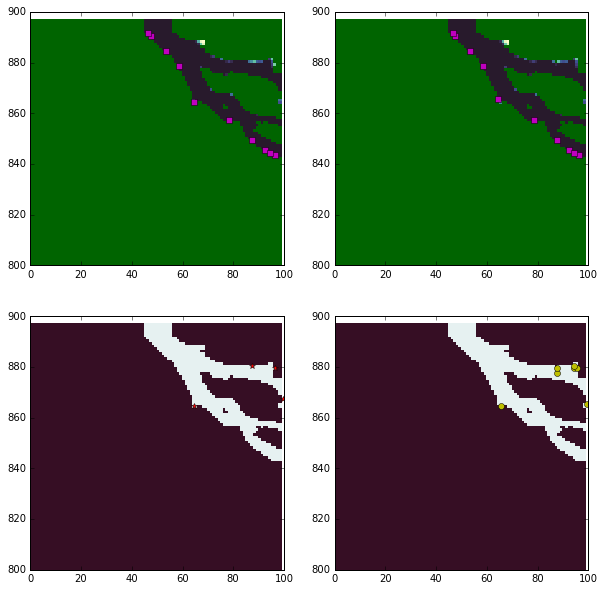

In [233]:
imin, imax = 800, 898
jmin, jmax = 0, 100
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

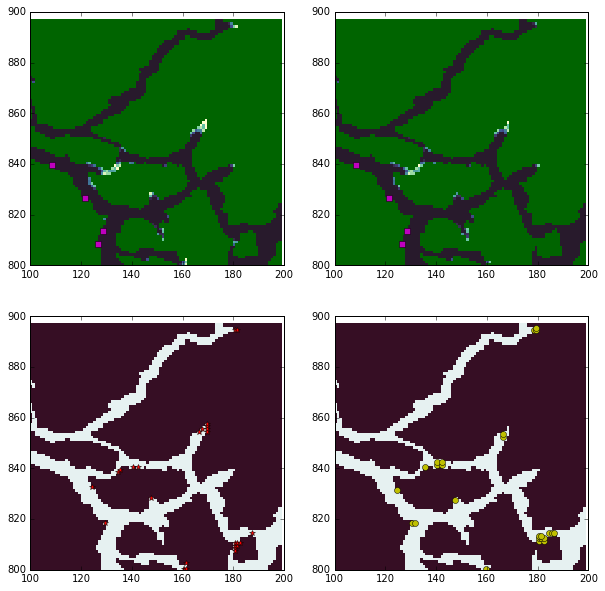

In [234]:
imin, imax = 800, 898
jmin, jmax = 100, 200
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

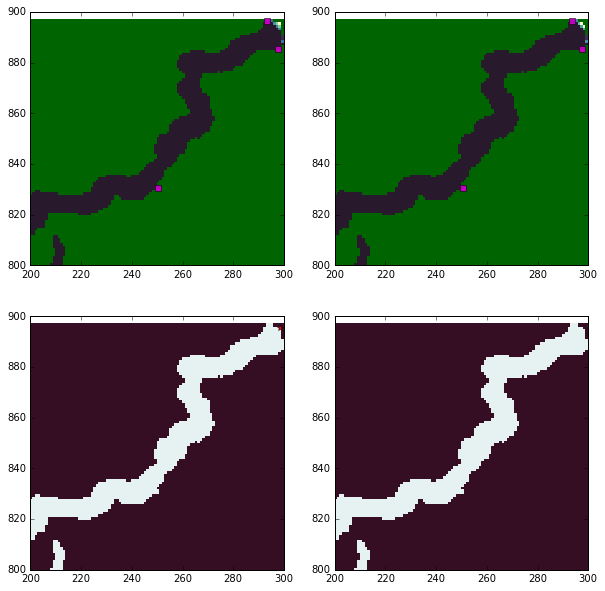

In [235]:
imin, imax = 800, 898
jmin, jmax = 200, 301
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

In [236]:
imin, imax = 800, 898
jmin, jmax = 300, 398
# empty

In [237]:
imin, imax = 700, 800
jmin, jmax = 0, 100
# empty

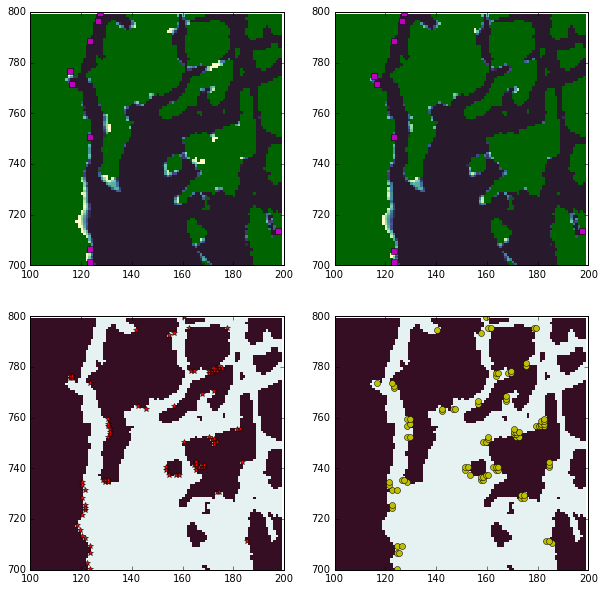

In [238]:
imin, imax = 700, 800
jmin, jmax = 100, 200
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

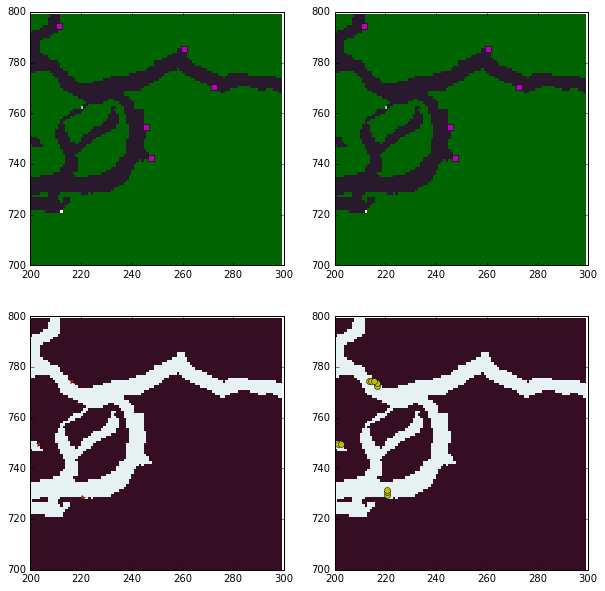

In [239]:
imin, imax = 700, 800
jmin, jmax = 200, 300
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

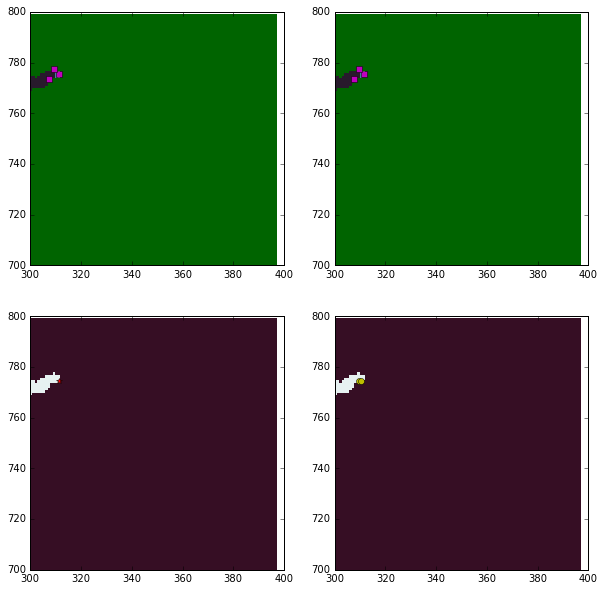

In [240]:
imin, imax = 700, 800
jmin, jmax = 300, 398
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

In [241]:
imin, imax = 600, 700
jmin, jmax = 0, 100
#empty

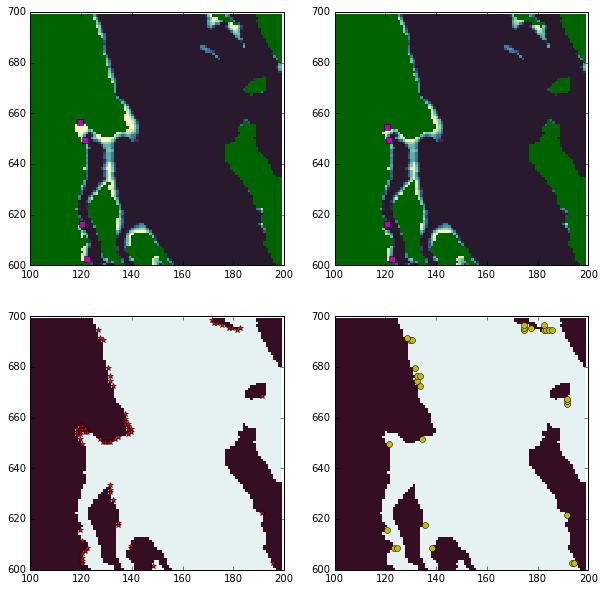

In [242]:
imin, imax = 600, 700
jmin, jmax = 100, 200
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

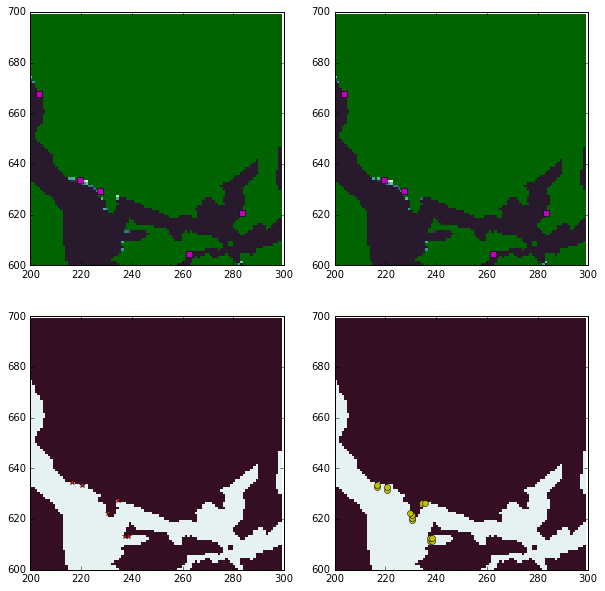

In [243]:
imin, imax = 600, 700
jmin, jmax = 200, 300
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

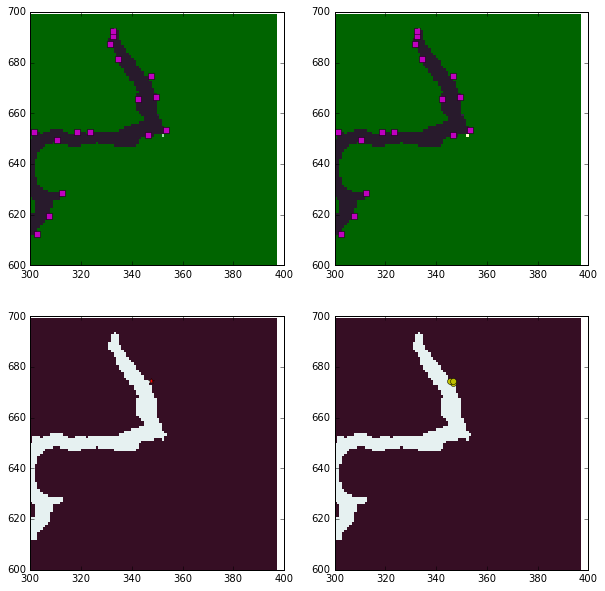

In [244]:
imin, imax = 600, 700
jmin, jmax = 300, 398
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8, vmax=40);

In [245]:
imin, imax = 500, 600
jmin, jmax = 0, 100
#empty

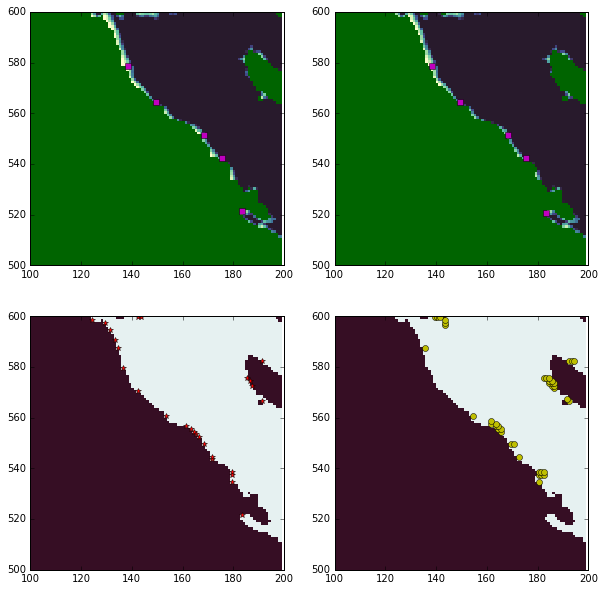

In [246]:
imin, imax = 500, 601
jmin, jmax = 100, 200
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

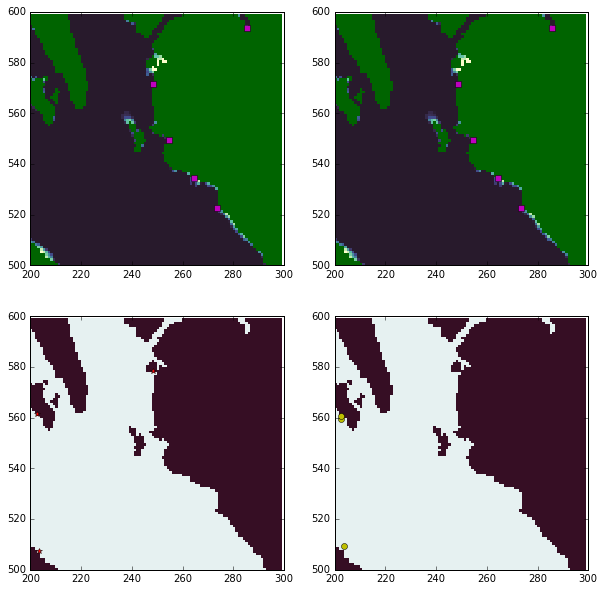

In [247]:
imin, imax = 500, 600
jmin, jmax = 200, 300
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

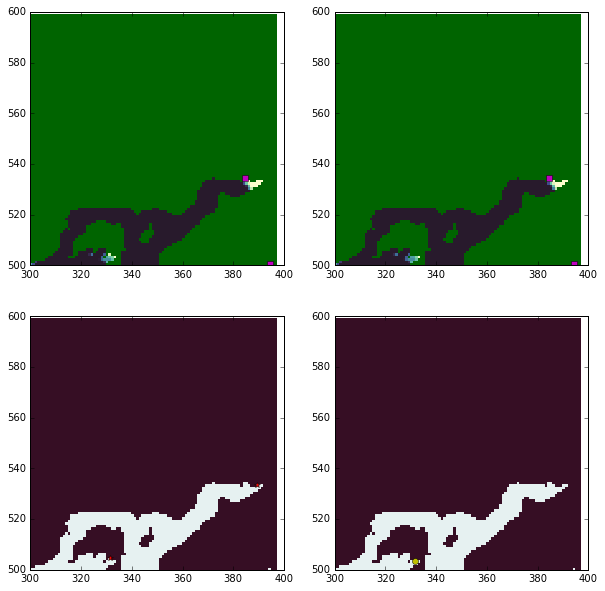

In [248]:
imin, imax = 500, 600
jmin, jmax = 300, 398
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

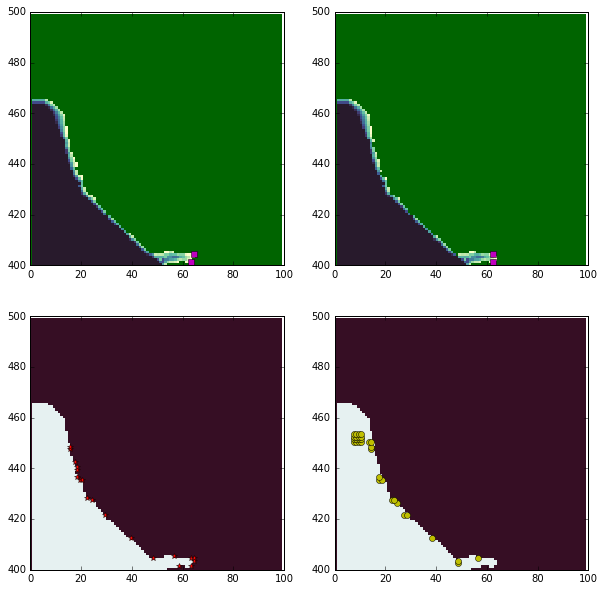

In [249]:
imin, imax = 400, 500
jmin, jmax = 0, 100
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

In [250]:
imin, imax = 400, 500
jmin, jmax = 100, 200
#empty

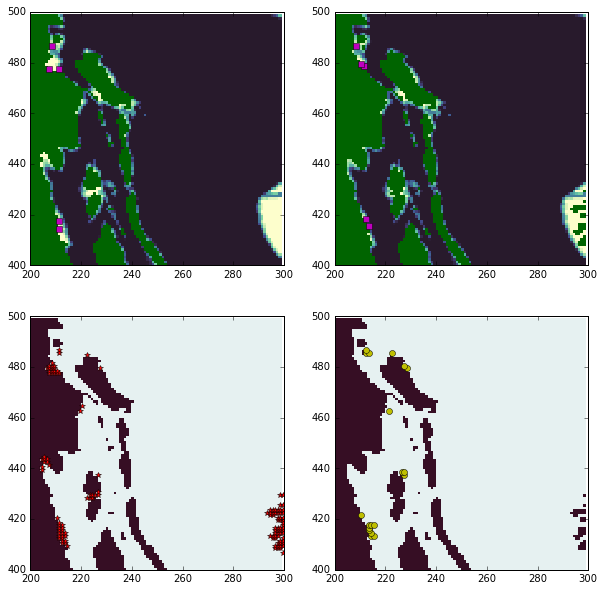

In [251]:
imin, imax = 400, 500
jmin, jmax = 200, 300
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

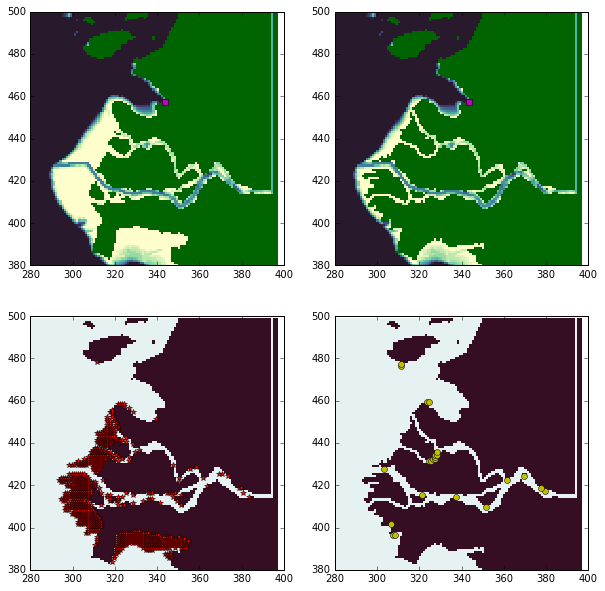

In [252]:
imin, imax = 380, 500
jmin, jmax = 280, 398
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

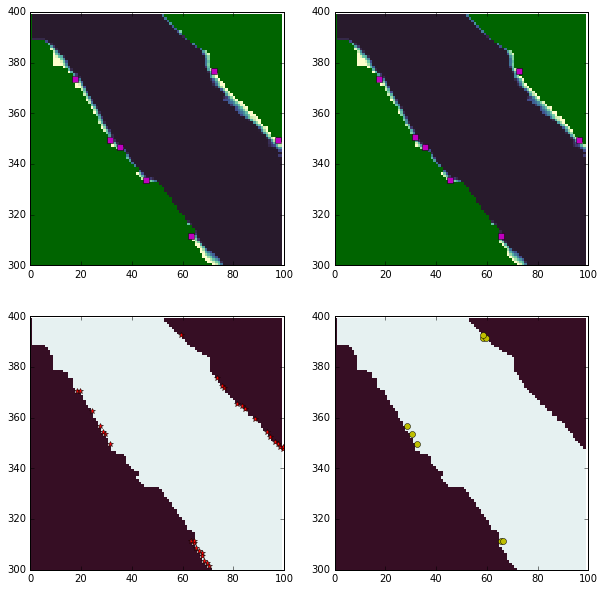

In [253]:
imin, imax = 300, 400
jmin, jmax = 0, 100
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

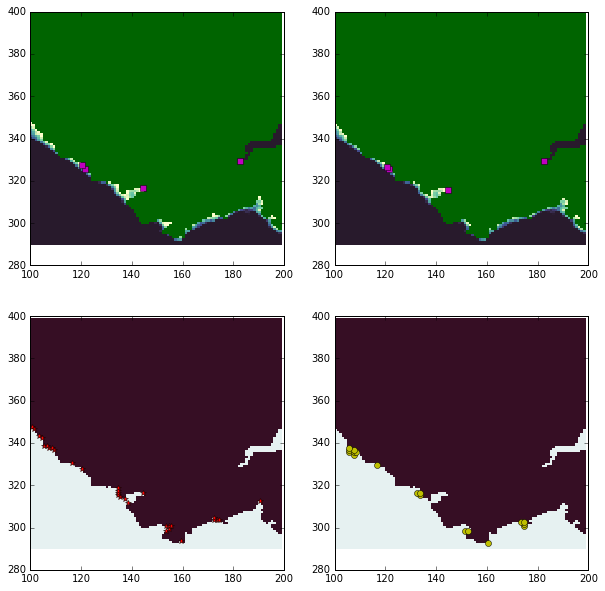

In [254]:
imin, imax = 290, 400
jmin, jmax = 100, 200
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

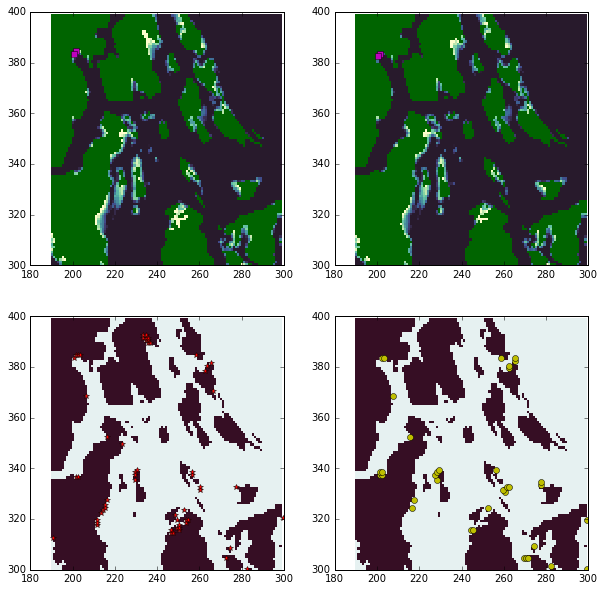

In [255]:
imin, imax = 300, 400
jmin, jmax = 190, 300
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

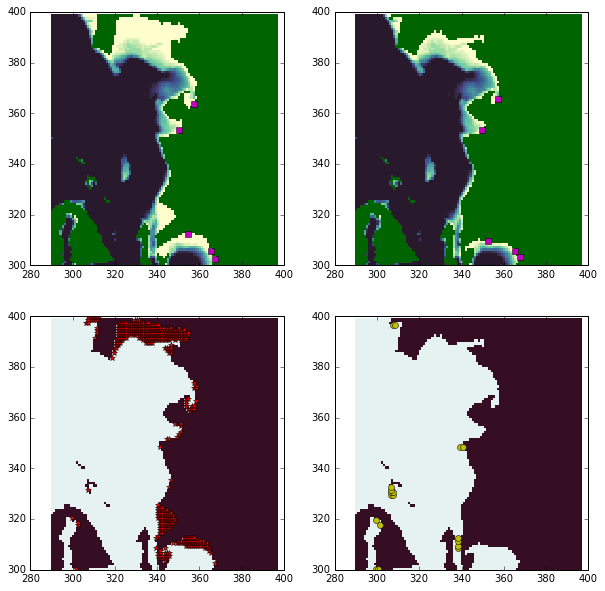

In [256]:
imin, imax = 300, 400
jmin, jmax = 290, 398
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

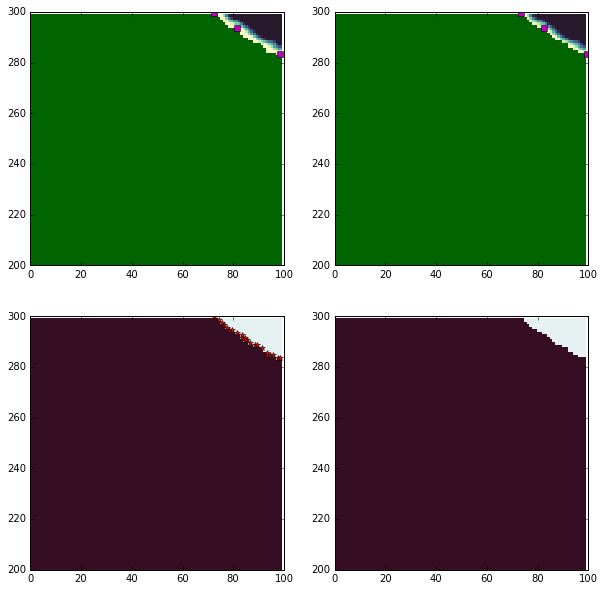

In [257]:
imin, imax = 200, 300
jmin, jmax = 0, 100
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

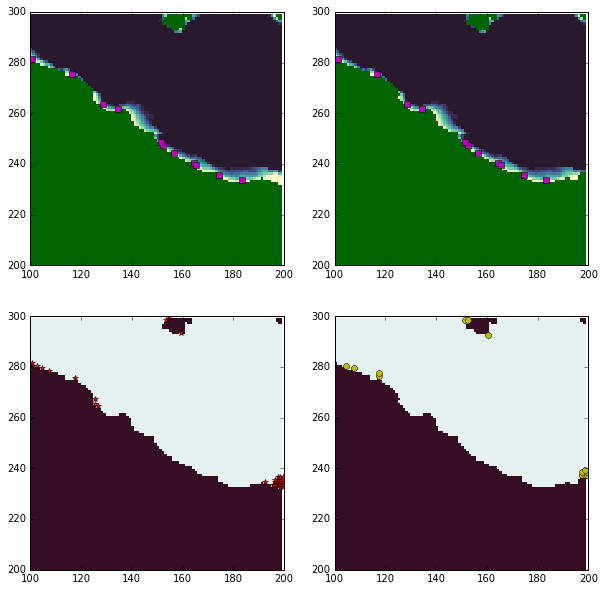

In [258]:
imin, imax = 200, 300
jmin, jmax = 100, 200
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

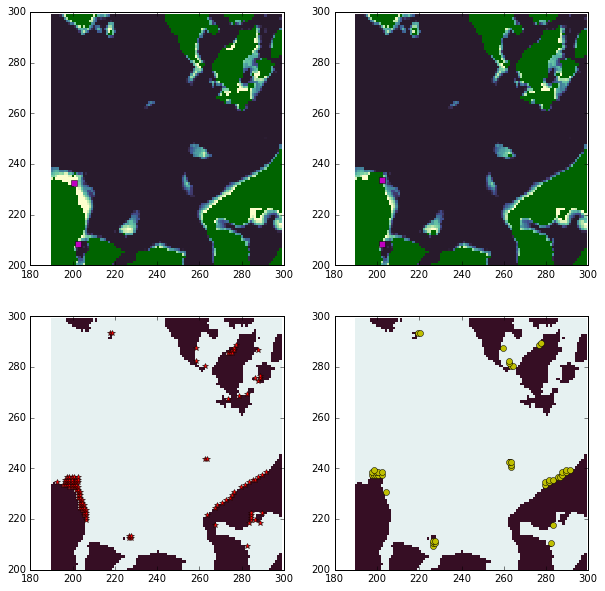

In [259]:
imin, imax = 200, 300
jmin, jmax = 190, 300
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

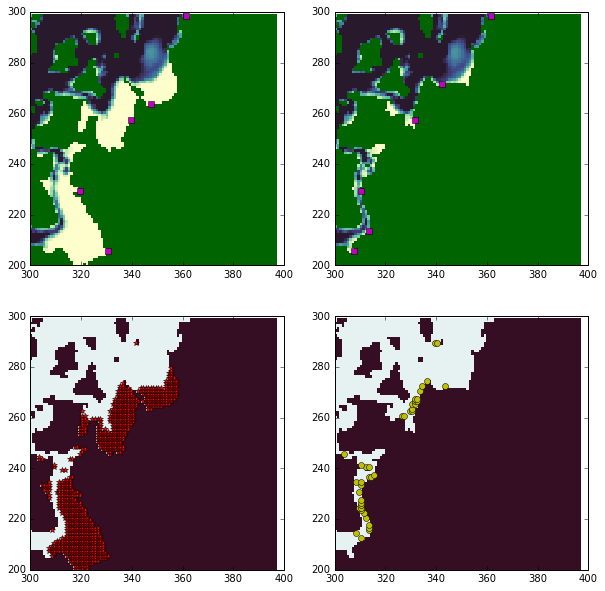

In [260]:
imin, imax = 200, 300
jmin, jmax = 300, 398
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8,surface_tmask_8);

In [261]:
imin, imax = 100, 200
jmin, jmax = 0, 100
#empty

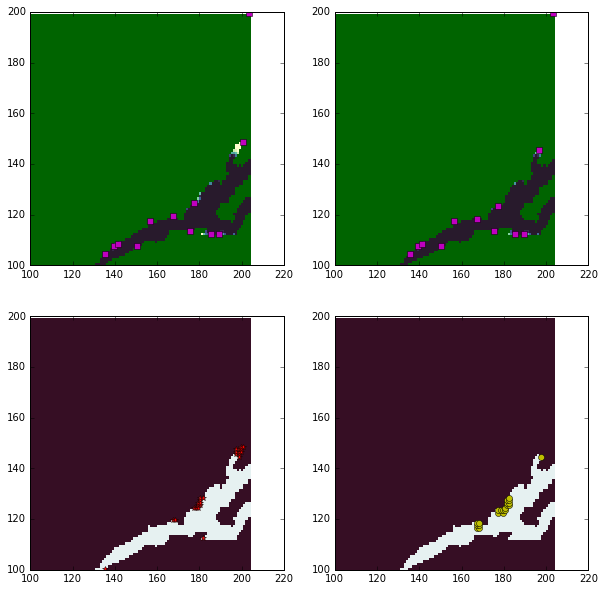

In [262]:
imin, imax = 100, 200
jmin, jmax = 100, 205
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

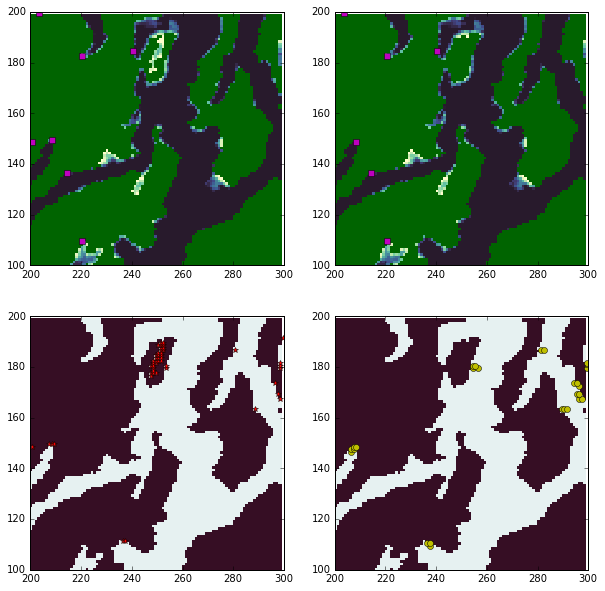

In [263]:
imin, imax = 100, 200
jmin, jmax = 200, 300
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

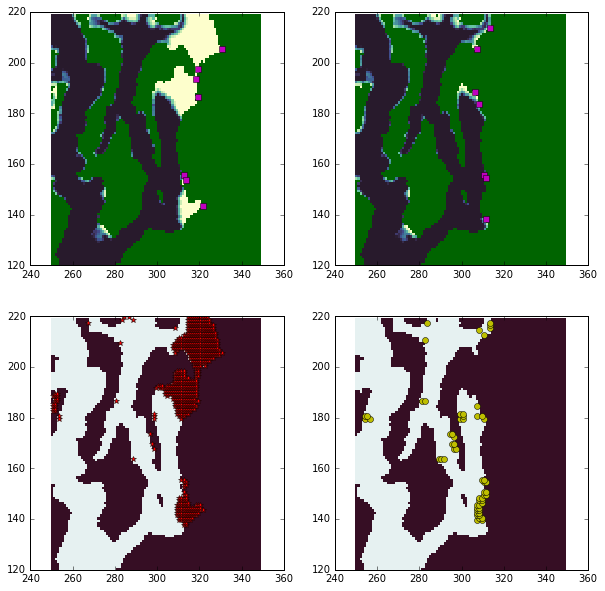

In [264]:
imin, imax = 120, 220
jmin, jmax = 250, 350
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

Need to go through my patches carefully.  Snohomish Bay here is a mess.  
Fixed in p3

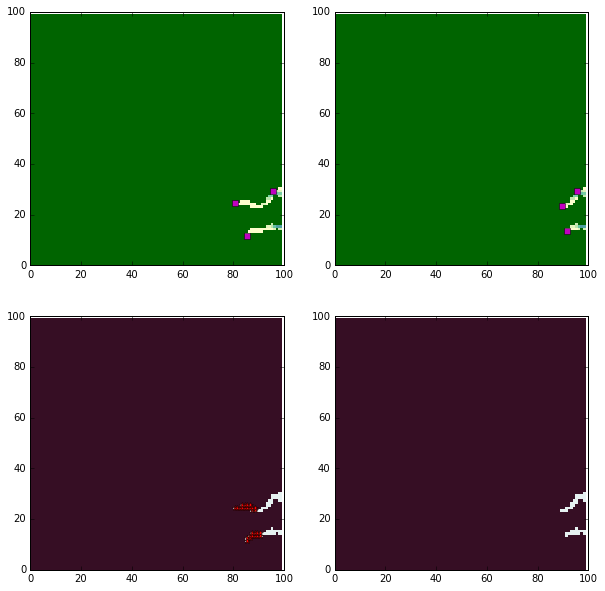

In [275]:
imin, imax = 0, 100
jmin, jmax = 0, 100
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

This one needs fixing.  I have a cutoff!  
Fixed in beta.

## Rivers Done to Here

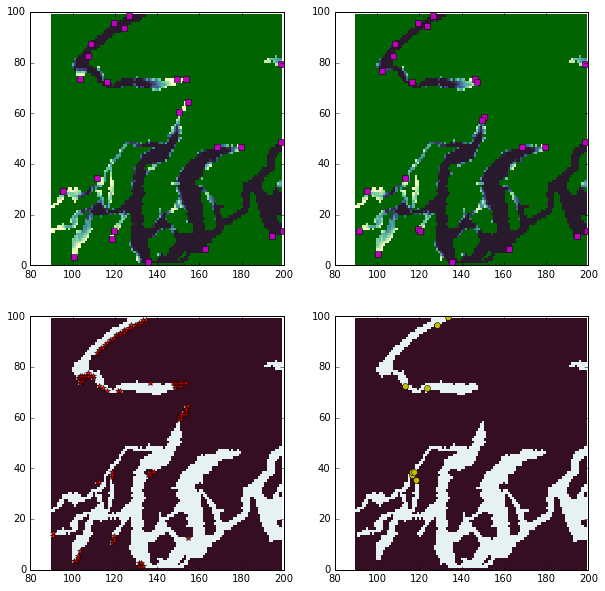

In [292]:
imin, imax = 0, 100
jmin, jmax = 90, 200
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

This one needs fixing.  I have a cutoff!  
Not in alpha

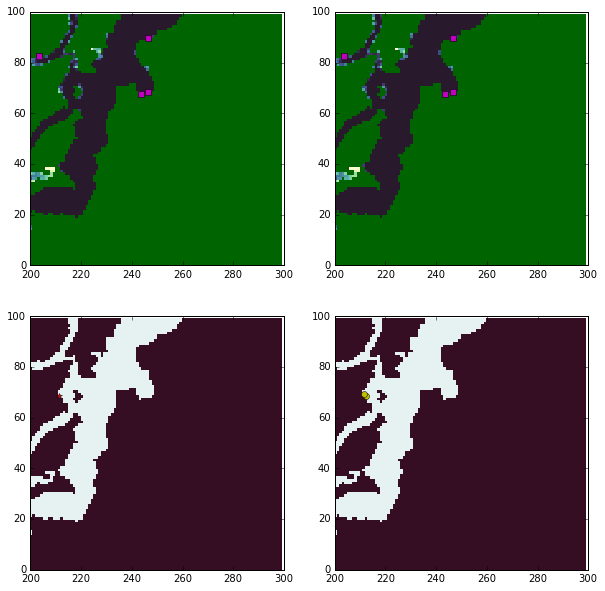

In [293]:
imin, imax = 0, 100
jmin, jmax = 200, 300
do_plots(imin, imax, jmin, jmax, NEMO_bathy_7, surface_tmask_7, NEMO_bathy_8, surface_tmask_8);

In [268]:
imin, imax = 0, 100
jmin, jmax = 300, 398
# empty